In [2]:
!pip install PyPDF2
!pip install jedi
!pip install textract
# Import required libraries
import PyPDF2
import textract
import re
import string
import pandas as pd
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 17.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 64.6 MB/s eta 0:00:00
  Preparing metadat

In [3]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Thesis_Niiaz/teachers_dataset.csv' ,encoding='utf-8')
data.head()

,position,cv
0,science_teacher,\naustin tx\nemail me on indeed httpwwwindeedc...
1,science_teacher,\nwaupun wi\nemail me on indeed httpwwwindeedc...
2,science_teacher,\nrichardson tx\nemail me on indeed httpwwwind...
3,science_teacher,\nnew port richey fl\nemail me on indeed httpw...
4,science_teacher,\nbuhl al\nemail me on indeed httpwwwindeedcom...


In [5]:
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc
from spacy import displacy

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [8]:
nlp = spacy.load("en_core_web_lg")
#ruler = nlp.add_pipe("ner")
nlp.remove_pipe("ner")


('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fc120812ba0>)

In [9]:
ruler = nlp.add_pipe("entity_ruler")

In [10]:
labels = [
    # general camrbidge intrenational eduaction knowledge
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"school"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"igcse"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"curriculum"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"british"}, {"LOWER":"curriculum"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"uk"}, {"LOWER":"curriculum"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"international"}, {"LOWER":"school"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"assessment"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"international"}, {"LOWER":"education"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"university"}, {"LOWER":"press"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"cem"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cem"}, {"LOWER":"assessment"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"incas"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"midyis"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"yellis"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cem ibe"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"igcse"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"extension"}, {"LOWER":"cambridge"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"introductory"}, {"LOWER":"cambridge"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"enrichment"}, {"LOWER":"cambridge"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"lower"}, {"LOWER":"secondary"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"lower"}, {"LOWER":"secondary"}, {"LOWER":"checkpoint"}]},
    {"label":"CAMBRIDGE SKILLS","pattern":[{"LOWER":"cambridge"},{"OP": "*", "IS_SPACE": True}, {"LOWER":"international"}]},
    
    
    # PE teachers' skills
    {"label":"PE SKILLS","pattern":[{"LOWER":"pe"}, {"IS_PUNCT": True, "OP": "?"},{"TEXT":"0069"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"pe"}, {"IS_PUNCT": True, "OP": "?"},{"TEXT":"0081"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"physical education"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0069"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"physical education"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0081"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"pe"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"physiology"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"physical"}, {"LOWER":"education"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"physical education"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0413"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"physical education"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0995"}]},
    {"label":"PE SKILLS","pattern":[{"LOWER":"physiology"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9990"}]},


    # primary teachers' skills 
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"english"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0058"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"english"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0844"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"maths"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0845"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"maths"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0096"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"science"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0846"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"science"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0097"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"primary"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"primary"}, {"LOWER":"checkpoint"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"primary"}, {"LOWER":"progression"}, {"LOWER":"test"}]},
    {"label":"PRIMARY SKILLS","pattern":[{"LOWER":"primary"}, {"LOWER":"global"}, {"LOWER": "perspectives"}]},

    # KG teachers' skills
    {"label":"KG SKILLS","pattern":[{"LOWER":"montessori"}]},
    {"label":"KG SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"early years"}]},
    {"label":"KG SKILLS","pattern":[{"LOWER":"EY"}, {"IS_DIGIT": True}]},
    {"label":"KG SKILLS","pattern":[{"LOWER":"early years"}, {"LOWER":"check"}]},

    # ART teachers' skills
    {"label":"ART SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"art"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"art"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0067"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"LOWER":"&"}, {"LOWER":"design"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0067"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"art"}, {"LOWER":"&"}, {"LOWER":"design"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0073"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"LOWER":"&"}, {"LOWER":"design"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0073"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0400"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0989"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"LOWER":"&"}, {"LOWER":"design"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0400"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"LOWER":"&"}, {"LOWER":"design"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0989"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"design"}, {"LOWER":"&"}, {"LOWER":"technology"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0445"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"design"}, {"LOWER":"&"}, {"LOWER":"technology"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0979"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9479"}]},
    {"label":"ART SKILLS","pattern":[{"LOWER":"art"}, {"LOWER":"&"}, {"LOWER":"design"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9479"}]},


    # MUSIC teachers' skills
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"music"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0068"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"music"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"drama"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"drama"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"music"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"music"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0078"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"drama"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0411"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"music"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0410"}]},
    {"label":"MUSIC SKILLS","pattern":[{"LOWER":"music"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0978"}]},


    # MATH teachers' skills 
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0862"}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"cambridge"}, {"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"igcse"}, {"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"additional"}, {"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}}]},
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"1112"}]},
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0580"}]},
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0606"}]},
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9207"}]},
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9207"}]},
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0980"}]},
    {"label":"MATH SKILLS","pattern":[{"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0607"}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"as"}, {"LOWER":"level"}, {"LOWER":"statistics"}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"a"}, {"LOWER":"level"}, {"LOWER":"statistics"}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"as"}, {"LOWER":"level"}, {"LOWER":"mechanics"}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"a"}, {"LOWER":"level"}, {"LOWER":"mechanics"}]},
    {"label":"MATH SKILLS","pattern":[{"LOWER":"gcse"}, {"TEXT": {"REGEX": "[Mm]ath[a-zA-Z]*"}}]},
    
    
    # SCIENCE teachers' skills
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"science"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0893"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"science"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"biology"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"physics"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"chemistry"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"combined"}, {"LOWER":"sciences"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"co-ordinated"}, {"LOWER":"sciences"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"environmental"}, {"LOWER":"management"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"science"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"biology"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"physics"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"chemistry"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"as"}, {"LOWER":"level"}, {"LOWER":"biology"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"as"}, {"LOWER":"level"}, {"LOWER":"physics"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"as"}, {"LOWER":"level"}, {"LOWER":"chemistry"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"a"}, {"LOWER":"level"}, {"LOWER":"biology"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"a"}, {"LOWER":"level"}, {"LOWER":"physics"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"a"}, {"LOWER":"level"}, {"LOWER":"chemistry"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"combined"}, {"LOWER":"sciences"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"co-ordinated"}, {"LOWER":"sciences"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"environmental"}, {"LOWER":"management"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"science"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"1113"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"biology"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0610"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"biology"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0970"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"chemistry"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0620"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"biology"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9700"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"chemistry"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9701"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"chemistry"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0971"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"physics"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0625"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"physics"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0972"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"physics"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9702"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"sciences"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0654"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"sciences"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0973"}]},
    {"label":"SCIENCE SKILLS","pattern":[{"LOWER":"environmental"}, {"LOWER":"management"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0680"}]},



    # ICT teachers' skills
    {"label":"ICT SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"ict"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"digital"}, {"LOWER":"literacy"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"igcse"}, {"LOWER":"ict"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"ict"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"cambridge"}, {"LOWER":"information"}, {"LOWER":"&"}, {"LOWER":"technology"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"computer"}, {"LOWER":"science"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0478"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"computer"}, {"LOWER":"science"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9618"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"digital"}, {"LOWER":"literacy"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0082"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"digital"}, {"LOWER":"literacy"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0072"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"computer"}, {"LOWER":"science"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0984"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"technology"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0417"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"technology"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0983"}]},
    {"label":"ICT SKILLS","pattern":[{"LOWER":"technology"}, {"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9626"}]},
    
    

    # ESL teachers' skills
    {"label":"ESL SKILLS","pattern":[{"LOWER":"english as a second language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0876"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"english as a second language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"1110"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"esl"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0876"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"esl"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"1110"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"english"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0861"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"english"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"1111"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"first"}, {"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0500"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"first"}, {"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0990"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"english"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0475"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"english"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0992"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0472"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0500"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0990"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0510"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0511"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0991"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0993"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"language"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9093"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"literacy"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"9695"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"esl"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0510"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"esl"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0511"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"esl"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0991"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"esl"},{"IS_PUNCT": True, "OP": "?"}, {"TEXT":"0993"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"igcse"},{"TEXT":"english"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"tefl"}]},
    {"label":"ESL SKILLS","pattern":[{"LOWER":"celta"}]},
    
]

for label in labels:
  ruler.add_patterns([label])


In [11]:
text = ' Teaching at cambridge \n international the lower secondary cambridge mathematics, igcse fmaths 0606, as level statistics 1 esl 1110 '
displacy.render(nlp(text), jupyter=True, style="ent")

In [12]:
def extract_from_pdf(file):
# Open pdf file
    pdfFileObj = open(file,'rb')


    # Read file
    pdfReader = PyPDF2.PdfReader(pdfFileObj)

    # Get total number of pages
    num_pages = len(pdfReader.pages)

    # Initialize a count for the number of pages
    count = 0

    # Initialize a text empty string variable
    text = ""

    # Extract text from every page on the file
    while count < num_pages:
        pageObj = pdfReader.pages[count]
        count +=1
        text += pageObj.extract_text()
    # Convert all strings to lowercase
    text = text.lower()

   
    #text = re.sub(r'\n',' ',text)

    # Remove punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return(text)
    

In [13]:
colors = {
    "CAMBRIDGE SKILLS": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "MATH SKILLS": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ESL SKILLS": "#ffd966",
    "SCIENCE SKILLS": "#e06666",
    "KG SKILLS": "#9fc5e8",
    "PRIMARY SKILLS": "#c27ba0",
    "MUSIC SKILLS": "#674ea7",
    "ART SKILLS": "#f9cb9c",
    "PE SKILLS": "#f8cb9c",
}
options = {
    "ents": [
        "CAMBRIDGE SKILLS",
        "MATH SKILLS",
        "ESL SKILLS",
        "SCIENCE SKILLS",
        "KG SKILLS",
        "PRIMARY SKILLS",
        "MUSIC SKILLS",
        "ART SKILLS",
        "PE SKILLS",
    ],
    "colors": colors,
}

In [15]:
sample_cv = "/content/drive/MyDrive/Thesis_Niiaz/sample 1.pdf"
text = extract_from_pdf(sample_cv)
print(displacy.render(nlp(text), jupyter=True, style="ent", options = options))

None


In [41]:
text

'curriculum vitae of kristofer porter  \npersonal details  \nname   kristofer porter  \ndate of birth  4th february 1987  \nnationality  british  \naddress  43 lincoln road  \n  south shields  \n  ne34 7jd  \n  united kingdom  \nemail   kportz7891 gmailcom  \nskype   kportz  \n \neducation  \npostgraduate certificate education international pgcei  \nuniversity of nottingham nottingham united kingdom  \n2020 21 \n \nmaster of arts in sociology hons  \nuniversity of aberdeen aberdeen united kingdom  \n2008 2013  \n \n120hr online tefl certificate  \nteflorg united kingdom  \n2020  \n \nexperience  \na level sociology and igcse english teacher home room teacher  \nthai singapore international school samut prakan thailand  \n2022 present  \n• taught a level sociology and igcse english first language in accor dance with the cambridge \ninternational curriculum  \n• developed and adapted materials to meet the individual learning needs of student s \n• organised performances and activities fo

In [16]:
sample_cv = "/content/drive/MyDrive/Thesis_Niiaz/sample_esl.pdf"
text = extract_from_pdf(sample_cv)
print(displacy.render(nlp(text), jupyter=True, style="ent", options = options))

None


In [22]:
sample_cv = "/content/drive/MyDrive/Thesis_Niiaz/sample_math.pdf"
text = extract_from_pdf(sample_cv)
print(displacy.render(nlp(text), jupyter=True, style="ent", options = options))

None


In [20]:
#sample_cv = "/content/drive/MyDrive/Thesis_Niiaz/Pamella-Arika.pdf"
#text = extract_from_pdf(sample_cv)
text = data.cv[0]
print(displacy.render(nlp(text), jupyter=True, style="ent", options = options))

None


In [ ]:


sent = nlp('cambridge school teacher igcse marking workshop student international school igcse extension course 80')
displacy.render(sent, style="ent", jupyter=True, options=options)

In [ ]:
sent = nlp('teacher of math, having Marking workshop and igcse introductory course at cambridge school, teaching MATHEMATICS 0580')
sent = nlp(data['cv'][0])
displacy.render(sent, style="ent", jupyter=True)
#print([t for t in sent.ents if t.label_ == 'SKILL'])

#displacy.render(nlp(text),style="ent",jupyter=True)

In [ ]:
import spacy
# Import the Matcher
from spacy.matcher import Matcher
# Load a model and create the nlp object
nlp = spacy.load("en_core_web_sm")
# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)
# Add the pattern to the matcher
pattern = [{"LOWER": "mathematics"}, {"IS_DIGIT": True}]
matcher.add("DATE_PATTERN", [pattern])
# Process some text
doc = nlp('teacher of math, having Marking workshop and igcse introductory course at cambridge school, teaching MATHEMATICS 0580')
# Call the matcher on the doc
matches = matcher(doc)
for match_id, start, end in matches:
 print(doc[start:end])

MATHEMATICS 058000


In [ ]:
import spacy
#nlp = spacy.load("en_core_web_sm")
tokens = nlp('The basket costs $10. I bought 6.')
print([(ent.text, ent.label_) for ent in tokens.ents])
# => [('10', 'MONEY'), ('6', 'CARDINAL')]
print([t for t in tokens.ents if t.label_ == 'SKILL'])
# => [10]

[('10', 'MONEY'), ('6', 'CARDINAL')]
[10]


In [ ]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["cv"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

In [ ]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,position,cv,Clean_Resume,skills
0,science_teacher,\naustin tx\nemail me on indeed httpwwwindeedc...,austin tx email indeed httpwwwindeedcomrsaraht...,[monitoring]
1,science_teacher,\nwaupun wi\nemail me on indeed httpwwwindeedc...,waupun wi email indeed httpwwwindeedcomradrian...,[]
2,science_teacher,\nrichardson tx\nemail me on indeed httpwwwind...,richardson tx email indeed httpwwwindeedcomrla...,[component]
3,science_teacher,\nnew port richey fl\nemail me on indeed httpw...,new port richey fl email indeed httpwwwindeedc...,"[data analysis, design, server, marketing, sup..."
4,science_teacher,\nbuhl al\nemail me on indeed httpwwwindeedcom...,buhl al email indeed httpwwwindeedcomrdianayes...,[business]


In [ ]:
fig = px.histogram(
    data, x="position", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
Job_cat = data["position"].unique()
Job_cat = np.append(Job_cat, "ALL")

In [ ]:
Total_skills = []
Job_Category = 'primary_teacher'
if Job_Category != "ALL":
    fltr = data[data["position"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

Text(0.5, 1.0, 'Most Used Words in primary_teacher Resume')

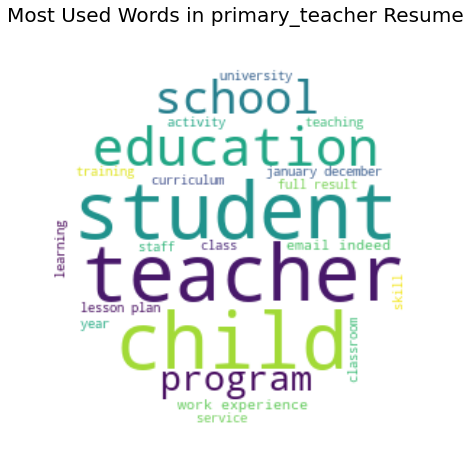

In [ ]:
text = ""
for i in data[data["position"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

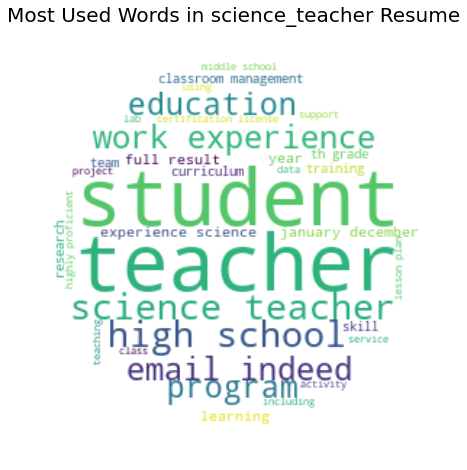

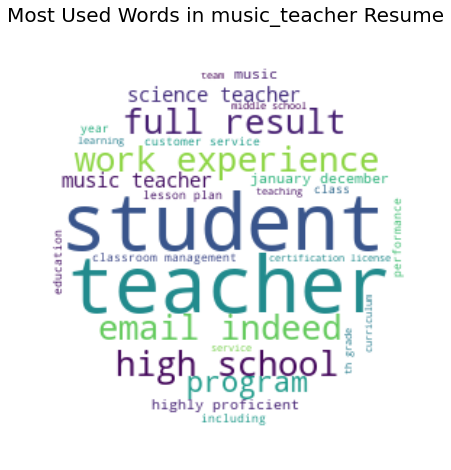

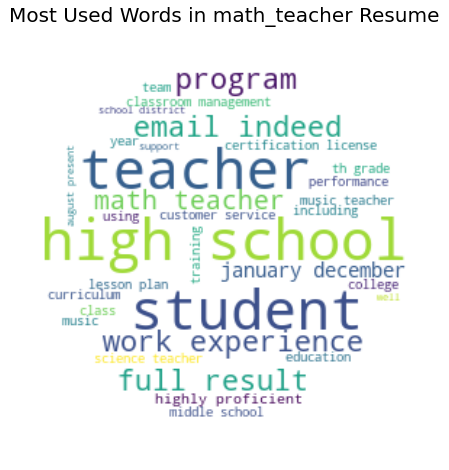

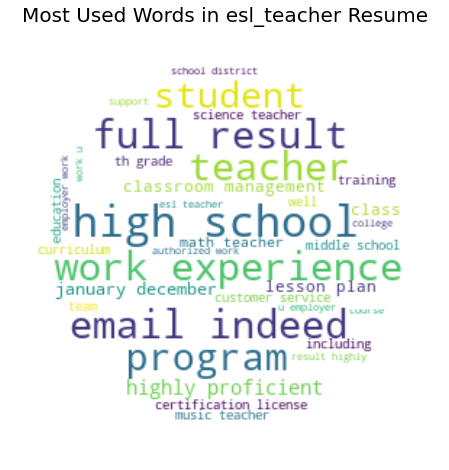

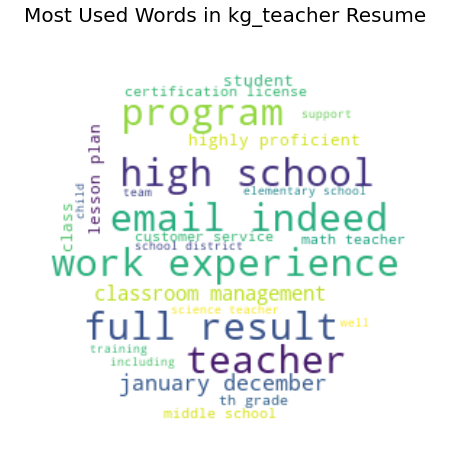

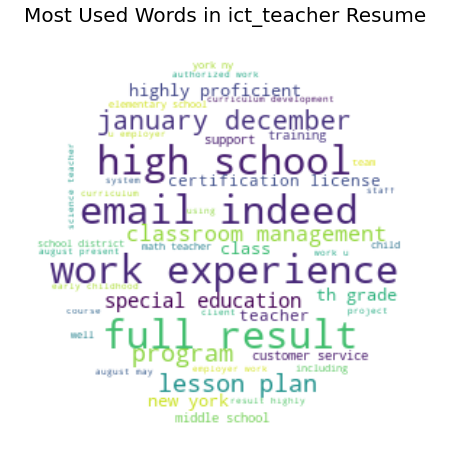

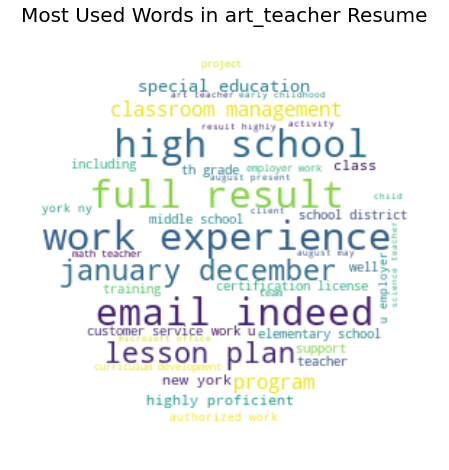

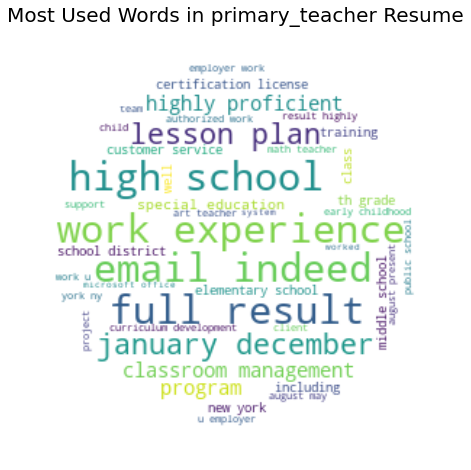

In [ ]:
text = ""
positions = data.position.unique()
for Job_Category in positions:
    for i in data[data["position"] == Job_Category]["Clean_Resume"].values:
        text += i + " "

    plt.figure(figsize=(8, 8))

    x, y = np.ogrid[:300, :300]

    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    wc = WordCloud(
        width=800,
        height=800,
        background_color="white",
        min_font_size=6,
        repeat=True,
        mask=mask,
    )
    wc.generate(text)

    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [ ]:
sent = nlp('teacher of math, having Marking workshop and cambridge introductory course')
displacy.render(sent, style="ent", jupyter=True)

In [ ]:
#sent = nlp(data["cv"].iloc[10])
displacy.render(sent, style="ent", jupyter=True)


ValueError: ignored

In [ ]:
patterns = data.position.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])


In [ ]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["cv"].iloc[1665])
displacy.render(sent, style="ent", jupyter=True, options=options)
